# Data Analysis: Answer the Key Questions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Key Question 1) 
#### What are the average, minimum, and maximum heart rate values on a daily basis?

1.1) Calculate **global** values of: *minimum heart rate*, *average heart rate*, *maximum heart rate*. <br>

In this section, we'll calculate:

- The lowest heart rate value ever recorded in the given time range.
- The average heart rate value recorded
- The highest heart rate value ever recorded in the given time range.

First, merge all the datasets about heart rates into one dataset

In [220]:
def merge_daily_datasets(folder_path):
    """
    Merge all the daily datasets into a single dataframe.

    Args:
        folder_path (str): Path to the folder containing all the daily datasets.
    Returns:
        pd.DataFrame: Complete merged Dataset
    """
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]
    dfs = []

    for f in all_files:
        date = os.path.basename(f).replace(".csv", "")
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(date)
        dfs.append(df)
        
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [221]:
heart_rates_directory = "data/cleaned/heart_rates"

heart_rates_df = merge_daily_datasets(heart_rates_directory)

heart_rates_df.head()

,timestamp,heart_rate,date
0,14:58,69.0,2024-12-21
1,15:00,70.0,2024-12-21
2,15:02,66.0,2024-12-21
3,15:04,71.0,2024-12-21
4,15:06,75.0,2024-12-21


In [222]:
heart_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   11790 non-null  object        
 1   heart_rate  11773 non-null  float64       
 2   date        11790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 276.5+ KB


In [223]:
def calculate_daily_hr_stats(df):
    """
    Calculates average, minimum and maximum heart rate on a daily basis.
    
    Args:
        complete_df (pd.DataFrame): Complete merged Dataset
    
    Returns:
        dict: Dictionary storing the global values of minimum, average and maximum heart rate.
    """
    stats = {
        "minimum": int(df['heart_rate'].min()),
        "average": int(df['heart_rate'].mean()),
        "maximum": int(df['heart_rate'].max())
    }
    return stats

In [224]:
global_values = calculate_daily_hr_stats(heart_rates_df)

for k, v in global_values.items():
    print(k + ' --> ' + str(v) + ' bpm.')

minimum --> 36 bpm.
average --> 64 bpm.
maximum --> 187 bpm.


1.2) View the minimum, average and maximum heart rate values on a daily basis for the last *n* days.

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_hr_values(df, n, show_minimum=True, show_average=True, show_maximum=True):
    """
    Displays, for the last n days, dynamic bars based on the parameters 
    show_minimum, show_average, and show_maximum.

    Args:
        df (pd.DataFrame): DataFrame containing 'date' and 'heart_rate' columns.
        n (int): Number of days to display.
        show_minimum (bool): If True, show bars for the minimum heart rate values.
        show_average (bool): If True, show bars for the average heart rate values.
        show_maximum (bool): If True, show bars for the maximum heart rate values.
    """
    
    grouped = df.groupby('date')['heart_rate'].agg(['min', 'mean', 'max']).reset_index()
    
    grouped = grouped.tail(n)
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(grouped))

    offset = 0

    if show_minimum:
        plt.bar([p + offset * bar_width for p in x], grouped['min'], width=bar_width, label='Min HR', color='#FFE1A8')
        offset += 1
    if show_average:
        plt.bar([p + offset * bar_width for p in x], grouped['mean'], width=bar_width, label='Mean HR', color='#E26D5C')
        offset += 1
    if show_maximum:
        plt.bar([p + offset * bar_width for p in x], grouped['max'], width=bar_width, label='Max HR', color='#472D30')
        offset += 1
    
    plt.xlabel('Date')
    plt.ylabel('Heart Rate')
    plt.title(f'Heart Rate Stats for Last {n} Days')
    plt.xticks([p + (offset - 1) * bar_width / 2 for p in x], grouped['date'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.yticks([i for i in range(0, 220, 10)])
    plt.legend()
    plt.tight_layout()

    plt.show()

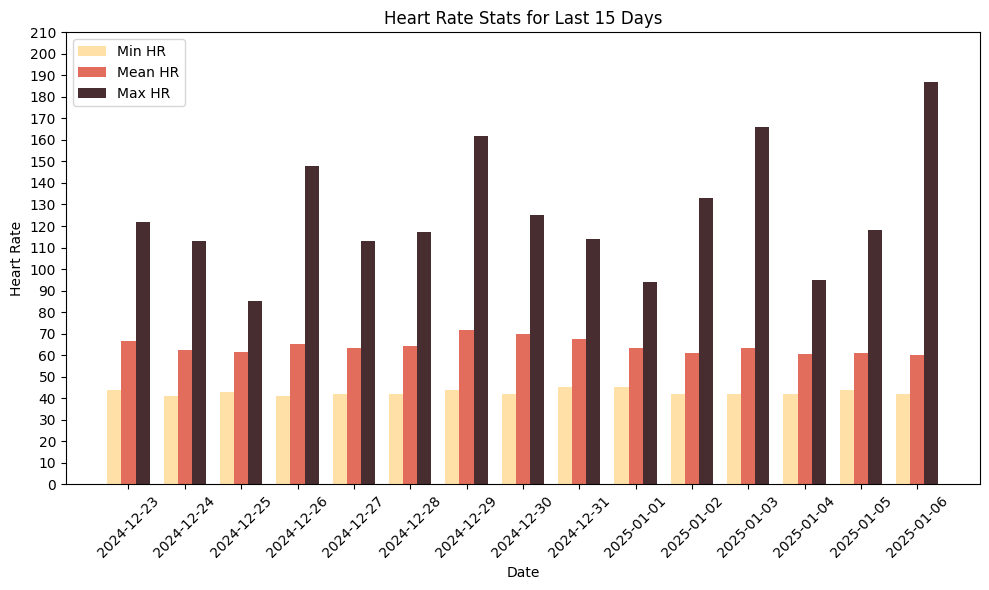

In [226]:
plot_hr_values(heart_rates_df, 15, show_minimum=True, show_average=True, show_maximum=True)

Test

In [227]:
int(heart_rates_df[heart_rates_df['date'] == '2024-12-29']['heart_rate'].mean())

71

1.3) Calculate and display minimum, average and maximum heart rate values on a daily basis based on the month entered as input.

In [228]:
def plot_monthly_hr_stats(df, month, year, reference_lines):
    """
    Displays bar plots for all days of a specific month, showing minimum, average, 
    and maximum heart rate values for each day.

    Args:
        df (pd.DataFrame): DataFrame containing 'date' and 'heart_rate' columns.
        month (int): Month to filter (e.g., 12 for December).
        year (int): Year to filter (e.g., 2024).
        reference_lines (dict): Dictionary of reference lines with keys as labels 
                                and values as the y-values (e.g., {"Resting HR": 60}).
    """
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    
    monthly_data = df[(df['date'].dt.month == month) & (df['date'].dt.year == year)]

    if monthly_data.empty:
        print(f"No data available for {month}-{year}.")
        return

    grouped = monthly_data.groupby('date')['heart_rate'].agg(['min', 'mean', 'max']).reset_index()

    plt.figure(figsize=(12, 6))
    bar_width = 0.25
    x = range(len(grouped))

    plt.bar(x, grouped['min'], width=bar_width, label='Min HR', color='#a6cee3')
    plt.bar([p + bar_width for p in x], grouped['mean'], width=bar_width, label='Mean HR', color='#1f78b4')
    plt.bar([p + 2 * bar_width for p in x], grouped['max'], width=bar_width, label='Max HR', color='#084594')
    
    if reference_lines:
        for label, y_value in reference_lines.items():
            plt.axhline(y=y_value, color='#4e3bf5', linestyle='--', linewidth=1, label=f'{label} ({y_value} bpm)')
    
    plt.xlabel('Date')
    plt.ylabel('Heart Rate')
    plt.title(f'Daily Heart Rate Metrics: {months[int(month)]} {year}', fontsize=16)
    plt.xticks([p + bar_width for p in x], grouped['date'].dt.strftime('%d'), rotation=45)
    plt.yticks([i for i in range(0, 220, 10)])
    plt.legend()

    plt.show()

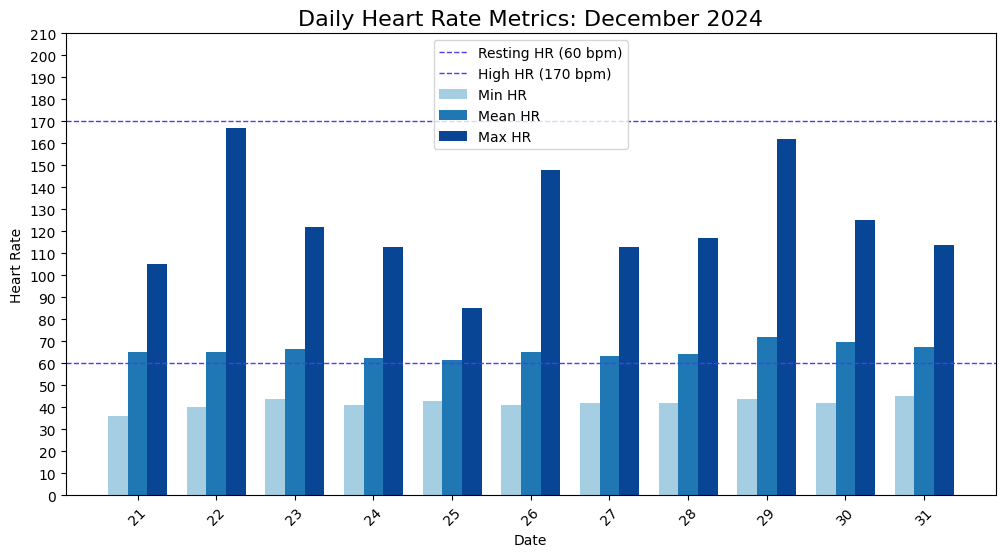

In [229]:
reference_lines = {"Resting HR": 60, "High HR": 170} # fix some values as a reference
plot_monthly_hr_stats(heart_rates_df, 12, 2024, reference_lines=reference_lines)

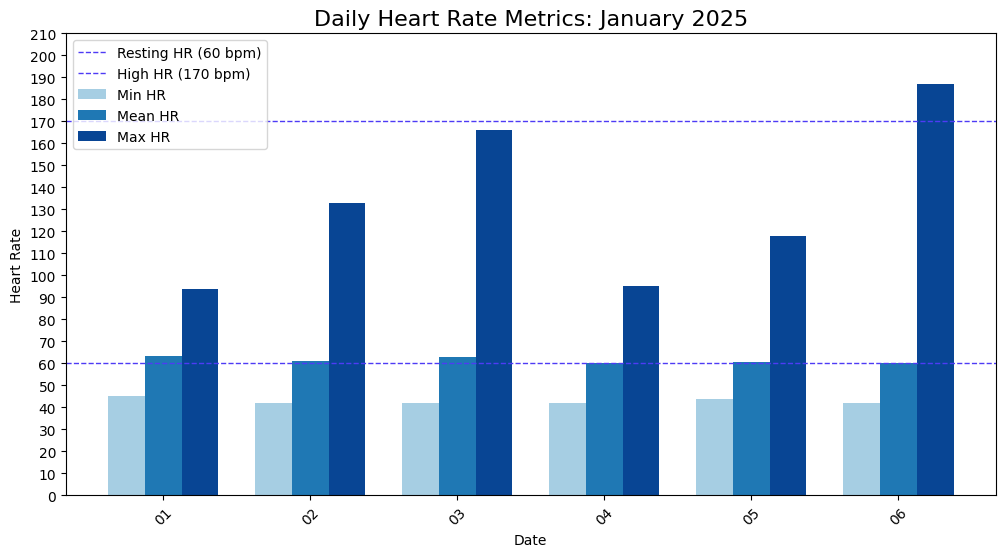

In [230]:
reference_lines = {"Resting HR": 60, "High HR": 170} # fix some values as a reference
plot_monthly_hr_stats(heart_rates_df, 1, 2025, reference_lines=reference_lines)

**Key Insights**: <br>

These graphs represent the daily heart rate metrics (minimum, average and maximum) for the month of December 2024 and January 2025 respectively. <br>
Th dotted lines represent a normal resting heart rate value (60bpm) and a high heart rate value (170bpm) respectively. <br>

- December 2024:
  For the days of December 22nd and December 29th, the graph shows a considerable variation between the average heart rate and the maximum heart rate.
  Conversely, December 25th represents a unique pattern, with a limited difference between the minimum heart rate and the maximum heart rate. This suggests a relaxing day.
  The average heart rate appears to be stable around the 60bpm value. The same for the minimum heart rate, that stabilizes around 40bpm.

- January 2025:
  For the days of January 3rd and January 6th, the graphs shows two significant peaks in maximum heart rate. <br>
  As for the month of December, the values of the minimum heart rate and average heart rate appear to be stable. 
  
The analysis combined with other parameters, such as sleep, could provide further insights to optimize cardiovascular health.

1.4) Calculate the total time spent (in minutes) in heart rate bands above a certain threshold on a daily basis (e.g., 100bpm).

**Note**: The dataset is assumed to have a regular structure. The dataset records values over two-minute time slots and this was verified during the data cleaning phase.

To answer this question, we'll compare two different scenarios:

1) The dataset, as specified above, records values over two minute time slots. Consequently, some values in the `timestamp` column are missing (e.g., 21:35). <br>
Example of first scenario <br>
Threshold = 100 <br>
| Timestamp | Heart Rate |
| --- | --- |
| 21:34 | 103 |
| 21:36 | 80 |
<br>

Fixed the threshold to 100, in the dataset above, we'll count 1 minute spent in heart rate zones above 100bpm (i.e., 21:34). Clearly, this scenario does not consider heart rate values for the missing timestamp (e.g., 21:35). For this reason we'll introduce the 2nd scenario.

2) We'll apply the linear interpolation to hypothesize the data relating to the missing times. <br>
Example of second scenario (Application of Linear Interpolation) <br>
| Timestamp | Heart Rate |
| --- | --- |
| 21:34 | 103 |
| **21:35** | **91.5** |
| 21:36 | 80 |
<br>

By using the linear interpolation, the heart rate value for the time **21:35** is calculated as the average value of the adjacent values.

In this case: <br>
$$
x = \frac{(103 + 80)}{2} = 91.5bpm
$$

References: https://en.wikipedia.org/wiki/Linear_interpolation <br>

Finally, we'll compare the two scenarios.

In [244]:
# without interpolation: 1st scenario
def calculate_time_in_hr_band(df, threshold):
    """
    Calculate the total time (in minutes) spent above a certain heart rate threshold on a daily basis.

    Args:
        df (pd.DataFrame): DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.

    Returns:
        pd.DataFrame: DataFrame with daily total minutes above the threshold.
    """
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%H:%M")
    
    df_above_threshold = df[df['heart_rate'] > threshold]

    time_above_threshold = (
        df_above_threshold.groupby('date').size()
    ).reset_index(name='minutes_above_threshold')

    all_dates = pd.DataFrame({'date': df['date'].unique()})
    time_above_threshold = pd.merge(all_dates, time_above_threshold, on='date', how='left')

    time_above_threshold['minutes_above_threshold'] = time_above_threshold['minutes_above_threshold'].fillna(0).astype(int)
    
    return time_above_threshold

In [245]:
def calculate_time_in_hr_band_with_interpolation(df, threshold, test=False):
    """
    Calculate the total time (in minutes) spent above a certain heart rate threshold on a daily basis,
    applying linear interpolation to fill missing timestamps.

    Args:
        df (pd.DataFrame): DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.
        test (bool): If True, print interpolated dataframe to verify the process.

    Returns:
        pd.DataFrame: DataFrame with daily total minutes above the threshold.
    """
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%H:%M")

    df = df.set_index(['date', 'timestamp'])

    resampled = df.groupby(level='date').apply(
        lambda group: group.resample('1min', level='timestamp').mean()
    )

    resampled.reset_index(inplace=True)
    
    resampled['heart_rate'] = resampled['heart_rate'].interpolate(method='linear')

    if test:
        print(resampled)

    df_above_threshold = resampled[resampled['heart_rate'] > threshold]
    
    time_above_threshold = (
        df_above_threshold.groupby('date').size()
    ).reset_index(name='minutes_above_threshold')
    
    all_dates = pd.DataFrame({'date': resampled['date'].unique()})
    time_above_threshold = pd.merge(all_dates, time_above_threshold, on='date', how='left')

    time_above_threshold['minutes_above_threshold'] = time_above_threshold['minutes_above_threshold'].fillna(0).astype(int)
    
    return time_above_threshold

In [246]:
df_scenario_1 = calculate_time_in_hr_band(heart_rates_df, 100)
df_scenario_1

,date,minutes_above_threshold
0,2024-12-21,1
1,2024-12-22,17
2,2024-12-23,36
3,2024-12-24,7
4,2024-12-25,0
5,2024-12-26,37
6,2024-12-27,19
7,2024-12-28,2
8,2024-12-29,53
9,2024-12-30,34


In [247]:
df_scenario_2 = calculate_time_in_hr_band_with_interpolation(heart_rates_df, 100)
df_scenario_2

,date,minutes_above_threshold
0,2024-12-21,1
1,2024-12-22,36
2,2024-12-23,68
3,2024-12-24,15
4,2024-12-25,0
5,2024-12-26,74
6,2024-12-27,35
7,2024-12-28,4
8,2024-12-29,108
9,2024-12-30,68


**Test**: Test the function that applies the linear interpolation.

In [248]:
test_data = {
    'timestamp': ['21:30', '21:32', '21:35', '21:37', '21:40', '21:42', '21:44', '21:46', '21:48', '21:50'],
    'heart_rate': [80, 85, 100, 95, 100, 103, 96, 93, 98, 110],
    'date': ['2024-12-26'] * 10
}

test_df = pd.DataFrame(test_data)
test_df['date'] = pd.to_datetime(test_df['date'], format="%Y-%m-%d")

test_df

,timestamp,heart_rate,date
0,21:30,80,2024-12-26
1,21:32,85,2024-12-26
2,21:35,100,2024-12-26
3,21:37,95,2024-12-26
4,21:40,100,2024-12-26
5,21:42,103,2024-12-26
6,21:44,96,2024-12-26
7,21:46,93,2024-12-26
8,21:48,98,2024-12-26
9,21:50,110,2024-12-26


In [249]:
test_output = calculate_time_in_hr_band_with_interpolation(test_df, 99, test=True)
test_output

         date           timestamp  heart_rate
0  2024-12-26 1900-01-01 21:30:00   80.000000
1  2024-12-26 1900-01-01 21:31:00   82.500000
2  2024-12-26 1900-01-01 21:32:00   85.000000
3  2024-12-26 1900-01-01 21:33:00   90.000000
4  2024-12-26 1900-01-01 21:34:00   95.000000
5  2024-12-26 1900-01-01 21:35:00  100.000000
6  2024-12-26 1900-01-01 21:36:00   97.500000
7  2024-12-26 1900-01-01 21:37:00   95.000000
8  2024-12-26 1900-01-01 21:38:00   96.666667
9  2024-12-26 1900-01-01 21:39:00   98.333333
10 2024-12-26 1900-01-01 21:40:00  100.000000
11 2024-12-26 1900-01-01 21:41:00  101.500000
12 2024-12-26 1900-01-01 21:42:00  103.000000
13 2024-12-26 1900-01-01 21:43:00   99.500000
14 2024-12-26 1900-01-01 21:44:00   96.000000
15 2024-12-26 1900-01-01 21:45:00   94.500000
16 2024-12-26 1900-01-01 21:46:00   93.000000
17 2024-12-26 1900-01-01 21:47:00   95.500000
18 2024-12-26 1900-01-01 21:48:00   98.000000
19 2024-12-26 1900-01-01 21:49:00  104.000000
20 2024-12-26 1900-01-01 21:50:00 

,date,minutes_above_threshold
0,2024-12-26,7


The function works correctly.

Visualize the two scenarios:

In [261]:
def plot_hr_threshold_comparison(df, threshold):
    """
    Plots a comparison of the time spent above a given heart rate threshold
    in two scenarios: with and without interpolation, and highlights the average scenario.

    Args:
        df (pd.DataFrame): Original DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.
    """
    df_scenario_1 = calculate_time_in_hr_band(df, threshold)
    
    df_scenario_2 = calculate_time_in_hr_band_with_interpolation(df, threshold)
    
    # Average Scenario Calculation
    df_average = pd.merge(
        df_scenario_1,
        df_scenario_2,
        on='date',
        suffixes=('_no_interp', '_with_interp')
    )
    df_average['minutes_above_threshold_avg'] = (
        (df_average['minutes_above_threshold_no_interp'] + df_average['minutes_above_threshold_with_interp']) / 2
    )
    
    plt.figure(figsize=(14, 6))
    
    # Scenario 1: Without Interpolation
    plt.plot(
        df_scenario_1['date'], df_scenario_1['minutes_above_threshold'], 
        label='Without Interpolation', color='#a6cee3', marker='o'
    )
    
    # Scenario 2: With Interpolation
    plt.plot(
        df_scenario_2['date'], df_scenario_2['minutes_above_threshold'], 
        label='With Interpolation', color='#1f78b4', marker='o'
    )
    
    # Average Scenario
    plt.plot(
        df_average['date'], df_average['minutes_above_threshold_avg'], 
        label='Average Scenario', color='#084594', linestyle='--', linewidth=2, marker='s'
    )
    
    # Graph details
    plt.title(f'Time Above {threshold} bpm: Comparison of Scenarios', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Minutes Above Threshold', fontsize=12)
    plt.xticks(df_scenario_1['date'], rotation=45)
    plt.yticks([i for i in range(0, threshold + 20, 5)])
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()

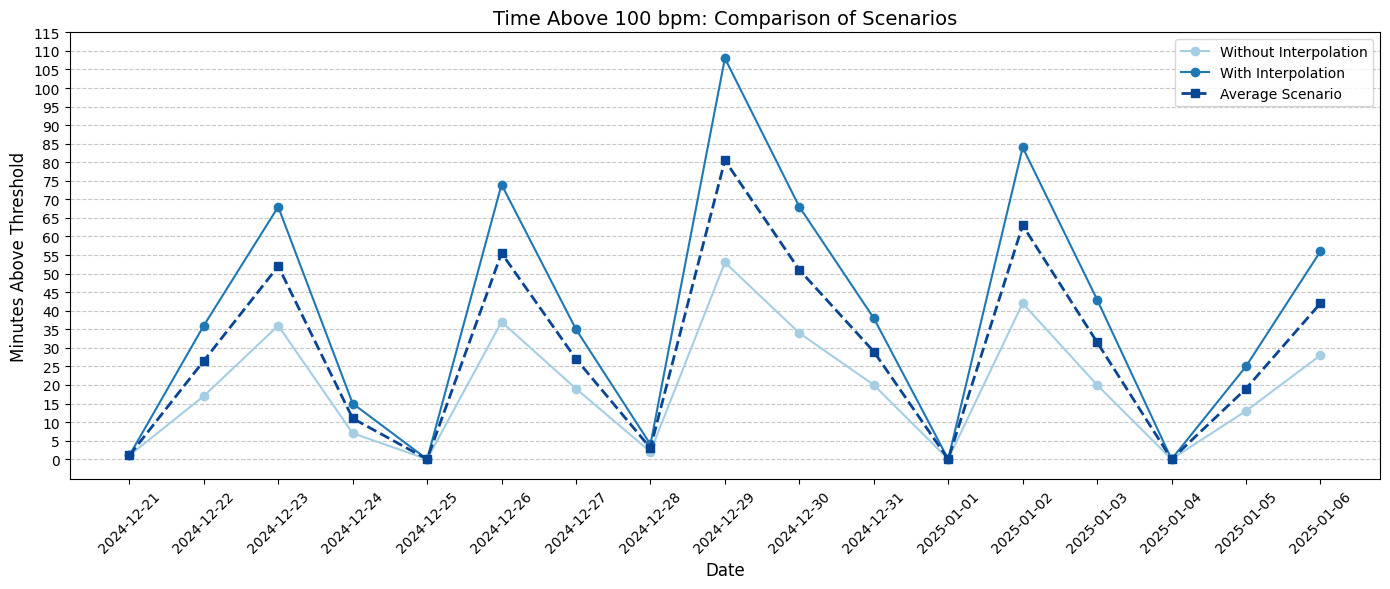

In [262]:
plot_hr_threshold_comparison(heart_rates_df, threshold=100)